# More Machine Learning

### BUSI 520 - Python for Business Research
### Kerry Back, JGSB, Rice University

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Example data

In [75]:
# Generate 50 features (predictors)
np.random.seed(0)
X = pd.DataFrame(
    np.random.normal(size=(1000, 50))
)

# Some noise
noise = np.random.normal(size=1000)

# Regression target
yr = X[0] + noise

# Binary target
yb = 1*(yr > 0)

# Multi-class target
ym = 1*(yr > -1) + 1*(yr > 1)

## Logit

Choose parameters to maximize fit of 
$$ \frac{1}{1+e^{-\sum \beta_i x_i}}$$
to the dummy variable.

* Scikit-learn's logistic regression can accomodate an $\ell^1$ penalty (lasso) or an $\ell^2$ penalty (ridge) or both (elastic net). 
* Specify penalty="l1", penalty="l2", penalty="elasticnet", or penalty="none."  
* The default imposes an $\ell^2$ penalty.  

* If penalty = "l1", specify solver (e.g., "saga").
* If penalty="elasticnet", specify l1_ratio and solver="saga."  
* The size of the penalty is inverse to the parameter C.
* The score for logistic regression is the fraction of correct predictions.  

In [76]:
# Split into train and test (cross-validate on train)
from sklearn.model_selection import train_test_split
X_train, X_test, yb_train, yb_test = train_test_split(
    X, yb, 
    test_size=0.2, 
    random_state=0
)

In [77]:
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression(penalty="l1", C=0.1, solver="saga")
model1.fit(X_train, yb_train)
score_train = model1.score(X_train, yb_train)
score_test = model1.score(X_test, yb_test)
print("fraction of correct predictions on training data is", score_train)
print("fraction of correct predictions on test data is", score_test)
model1.coef_

fraction of correct predictions on training data is 0.77625
fraction of correct predictions on test data is 0.71


array([[ 1.73859559e+00, -8.99671472e-04, -4.31977075e-02,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.41933031e-01,  0.00000000e+00,  1.39790895e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.10172386e-02,  0.00000000e+00, -5.61635689e-02,
         2.45219827e-02,  0.00000000e+00,  0.00000000e+00,
         7.98783289e-02,  0.00000000e+00, -8.65180577e-02,
         1.55867372e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -7.52358606e-03,  0.00000000e+00,
         0.00000000e+00, -8.46462309e-02, -5.74706698e-02,
         0.00000000e+00,  2.41749474e-02,  0.00000000e+00,
         0.00000000e+00, -1.35431792e-02,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -2.17087795e-02,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00]])

In [78]:
model2 = LogisticRegression(penalty="l1", C=100, solver="saga")
model2.fit(X_train, yb_train)
score_train = model2.score(X_train, yb_train)
score_test = model2.score(X_test, yb_test)
print("fraction of correct predictions on training data is", score_train)
print("fraction of correct predictions on test data is", score_test)
model2.coef_

fraction of correct predictions on training data is 0.78875
fraction of correct predictions on test data is 0.705


array([[ 2.07939039e+00, -1.27068160e-01, -1.03178244e-01,
        -1.07083319e-01,  5.59516272e-03,  8.54410427e-02,
         3.82266719e-02, -3.65650954e-02,  1.57689612e-02,
         3.08425763e-01, -9.40833788e-02,  2.25935105e-01,
         1.20957912e-02, -9.14226711e-02,  1.50427781e-02,
        -3.78116929e-02, -4.36459334e-03, -6.60978681e-02,
         1.07393962e-01,  3.81311515e-02, -1.31600868e-01,
         1.20535262e-01, -8.87493423e-02,  1.49447196e-03,
         2.17827288e-01, -6.29915768e-03, -1.60071959e-01,
         2.82957032e-01,  2.07920876e-02, -2.32818421e-02,
        -6.17009935e-02, -1.22727719e-01, -5.48546121e-03,
        -1.76118195e-02, -1.91506291e-01, -1.69292202e-01,
         1.25097790e-02,  1.19281217e-01, -3.07577472e-03,
        -3.47747150e-03, -7.81337019e-02, -2.19654589e-02,
        -6.46058446e-02, -8.21649004e-02,  4.43894233e-02,
        -1.08388588e-01,  6.57828732e-02,  2.46322359e-03,
        -4.88500590e-02,  5.88734798e-02]])

In [79]:
model1.predict(X_test)

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0])

* predicted probabilities (for y=0 and y=1) 
* prediction is 0 if predicted prob for y=0 is > 1/2

In [80]:
model1.predict_proba(X_test)

array([[0.42078057, 0.57921943],
       [0.71472459, 0.28527541],
       [0.73447825, 0.26552175],
       [0.89019094, 0.10980906],
       [0.75379542, 0.24620458],
       [0.55223312, 0.44776688],
       [0.82134974, 0.17865026],
       [0.79943129, 0.20056871],
       [0.28633232, 0.71366768],
       [0.49121064, 0.50878936],
       [0.05301771, 0.94698229],
       [0.15505116, 0.84494884],
       [0.92151082, 0.07848918],
       [0.12692082, 0.87307918],
       [0.07232575, 0.92767425],
       [0.77494671, 0.22505329],
       [0.19047891, 0.80952109],
       [0.10402037, 0.89597963],
       [0.91408138, 0.08591862],
       [0.84017193, 0.15982807],
       [0.29780843, 0.70219157],
       [0.13250638, 0.86749362],
       [0.72287863, 0.27712137],
       [0.79206844, 0.20793156],
       [0.83030724, 0.16969276],
       [0.3111865 , 0.6888135 ],
       [0.20804034, 0.79195966],
       [0.56862647, 0.43137353],
       [0.68698105, 0.31301895],
       [0.88075267, 0.11924733],
       [0.

## Exercise

Run GridSearchCV on the training data to find the best $C$ in (0.001, 0.01, 0.1, 1, 10, 100) for logit with an $\ell^1$ penalty.

### Confusion matrix

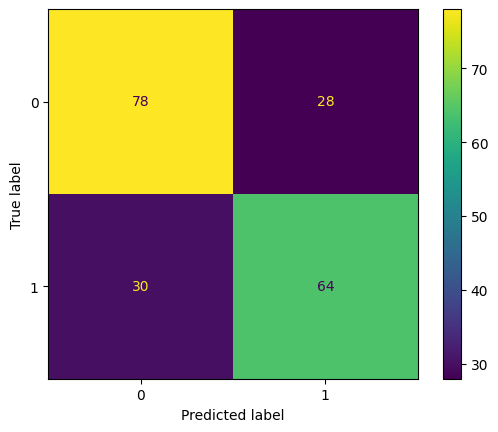

In [81]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(
    estimator=model1, 
    X=X_test, 
    y=yb_test
)

### ROC curve

* ROC = Receiver Operating Characteristics (not sure why).  
* In binary classification, we can vary the threshold to change the frequency of "positive" predictions (in our case, positive = return above median).  
* Hopefully, we can increase the number of true positives without increasing the number of false positives too much.  
* This corresponds to an ROC curve above the 45 degree line.  

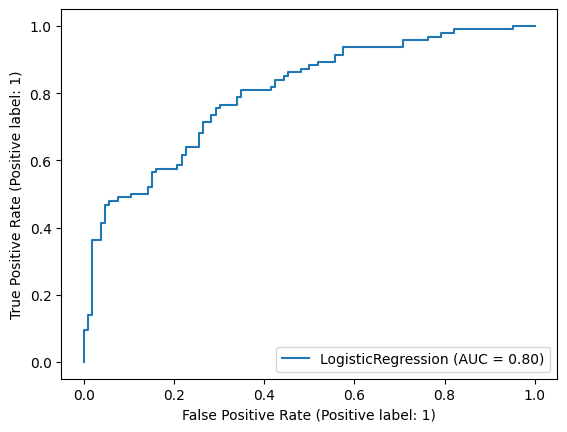

In [82]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(
    estimator=model1, 
    X=X_test, 
    y=yb_test, 
)
plt.show()

### Multi-class classification

In [83]:
# Split into train and test (cross-validate on train)
from sklearn.model_selection import train_test_split
X_train, X_test, ym_train, ym_test = train_test_split(
    X, ym, 
    test_size=0.2, 
    random_state=0
)

In [84]:
model = LogisticRegression(penalty="l1", C=0.1, solver="saga")
model.fit(X_train, ym_train)
score_train = model.score(X_train, ym_train)
score_test = model.score(X_test, ym_test)
print("fraction of correct predictions on training data is", score_train)
print("fraction of correct predictions on test data is", score_test)

fraction of correct predictions on training data is 0.64
fraction of correct predictions on test data is 0.585


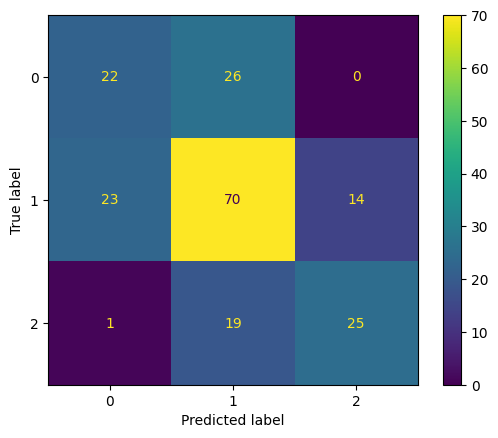

In [85]:
ConfusionMatrixDisplay.from_estimator(estimator=model, X=X_test, y=ym_test)

## Decision Trees

* Split dataset into two parts based on some variable > some value or not (Yes or No).
* Split each subset further in the same way
* Continue for max_depth.  Final sets are called leaves.
* For classification, prediction for each observation is the most common type in its leaf.
* For regression, prediction for each observation is the mean value in its leaf.
* In regression, each split is chosen to minimize weighted averages of MSEs.  
* In classification, each split is chosen to minimize weighted average of impurities.

## Impurity measures

* classes $k=1, \ldots, K$
* $p_k = $ frequency of class $k$
* Gini index:
$$ \sum_{k=1}^K p_k(1-p_k)$$
* Entropy:
$$ - \sum_{k=1}^K p_k\log(p_k)$$

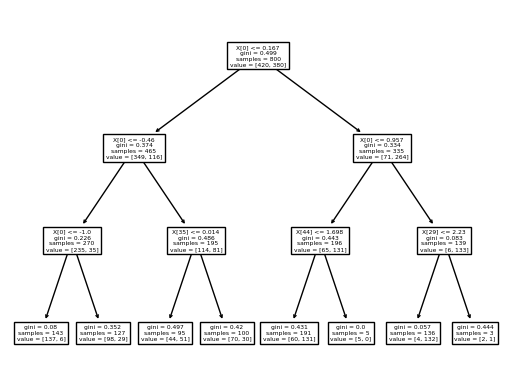

In [86]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

model = DecisionTreeClassifier(in)

plot_tree(model)
plt.show()

## Feature importances

In [87]:
model.feature_importances_,

(array([0.9232982 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.01470647,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.03371659, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.02827874,
        0.        , 0.        , 0.        , 0.        , 0.        ]),)

## Exercise

Fit the decision tree classifier on the training data for max_depth in (2, 3, 4, 5, 6) and plot the train and test scores as a function of max_depth.

## Decision tree regressor

In [88]:
# Split into train and test (cross-validate on train)
from sklearn.model_selection import train_test_split
X_train, X_test, yr_train, yr_test = train_test_split(
    X, yr, 
    test_size=0.2, 
    random_state=0
)

In [89]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(
  max_depth=4,
  random_state=0
)
model.fit(X_train, yr_train)
score_train = model.score(X_train, yr_train)
score_test = model.score(X_test, yr_test)
print("R-squared on training data is", score_train)
print("R-squared on test data is", score_test)

R-squared on training data is 0.578255375089929
R-squared on test data is 0.4381758056196261


## Bagging

* Bagging = bootstrap and aggregate
* Bootstrap random samples (draw with replacement from original data)
* Fit estimator to each random sample
* Average estimates
* Bagging decision trees = random forest

## Random forests

* For classification or regression
* Generate bootstrapped data sets.  Fit a decision tree to each.
* For each observation, answer Yes or No questions for each tree to find its leaf and its
prediction in each tree.  
* Average predictions for regression or use most common prediction for classification.


In [90]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
  max_depth=3,
  n_estimators=100,
  random_state=0
)
model.fit(X_train, yb_train)
score_train = model.score(X_train, yb_train)
score_test = model.score(X_test, yb_test)
print("fraction correct on training data is", score_train)
print("fraction correct on test data is", score_test)

fraction correct on training data is 0.83
fraction correct on test data is 0.7


## Exercise

Run GridSearchCV on the training data for RandomForestClassifier to find the best max_depth in (2, 3, 4, 5, 6).

## Boosting

* For regression or classification.
* Fit a decision tree
* Look at the errors and fit another decision tree
* Combine the two trees to form a new model (e.g., average their predictions)
* Look at the errors and fit another tree, etc.


* Gradient boosting: fit a tree to the errors and add the error prediction to the original prediction.
* Adaptive boosting: increase the weight on the misfit observations, fit another tree, and average them.
* XGBoost: optimized version of gradient boosting
* Learning rate: what weight to put on new trees.  Low learning rate avoids oscillation and improves convergence.


In [91]:
from sklearn.ensemble import (
    GradientBoostingRegressor, 
    GradientBoostingClassifier, 
    AdaBoostRegressor, 
    AdaBoostClassifier
)

from xgboost import XGBRegressor, XGBClassifier

In [92]:
model = XGBRegressor(
    max_depth=4,
    learning_rate=0.01,
    n_estimators=100
)
model.fit(X_train, yr_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [93]:
score_train = model.score(X_train, yr_train)
score_test = model.score(X_test, yr_test)
print("R-squared on training data is", score_train)
print("R-squared on test data is", score_test)

R-squared on training data is 0.5322574220908204
R-squared on test data is 0.41011680847293763


## Scikit-learn toy datasets

In [94]:
# binary

from sklearn.datasets import load_breast_cancer
X1, y1 = load_breast_cancer(return_X_y=True)
print(f"(numobs, numfeatures) = {X1.shape}")
print(f"target values are {np.unique(y1)}")

(numobs, numfeatures) = (569, 30)
target values are [0 1]


In [95]:
# multi-class

from sklearn.datasets import load_digits
X2, y2 = load_digits(return_X_y=True)
print(f"(numobs, numfeatures) = {X2.shape}")
print(f"target values are {np.unique(y2)}")

(numobs, numfeatures) = (1797, 64)
target values are [0 1 2 3 4 5 6 7 8 9]


In [96]:
# regression

from sklearn.datasets import load_diabetes
X3, y3 = load_diabetes(return_X_y=True)
print(f"(numobs, numfeatures) = {X3.shape}")
print(f"target values are {np.unique(y3)}")

(numobs, numfeatures) = (442, 10)
target values are [ 25.  31.  37.  39.  40.  42.  43.  44.  45.  47.  48.  49.  50.  51.
  52.  53.  54.  55.  57.  58.  59.  60.  61.  63.  64.  65.  66.  67.
  68.  69.  70.  71.  72.  73.  74.  75.  77.  78.  79.  80.  81.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 107. 108. 109. 110. 111. 113. 114.
 115. 116. 118. 120. 121. 122. 123. 124. 125. 126. 127. 128. 129. 131.
 132. 134. 135. 136. 137. 138. 139. 140. 141. 142. 143. 144. 145. 146.
 147. 148. 150. 151. 152. 153. 154. 155. 156. 158. 160. 161. 162. 163.
 164. 166. 167. 168. 170. 171. 172. 173. 174. 175. 177. 178. 179. 180.
 181. 182. 183. 184. 185. 186. 187. 189. 190. 191. 192. 195. 196. 197.
 198. 199. 200. 201. 202. 206. 208. 209. 210. 212. 214. 215. 216. 217.
 219. 220. 221. 222. 225. 229. 230. 232. 233. 235. 236. 237. 241. 242.
 243. 244. 245. 246. 248. 249. 252. 253. 257. 258. 259. 261. 262. 263.
 264. 265. 268. 270. 272.